<a href="https://colab.research.google.com/github/pranitamenavlikar/WhatIsTheDish/blob/main/WhatIsTheDish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Multilabel-Classification-master.zip

In [ ]:
!rm -rf /content/Recipes5k

In [ ]:
!git clone https://github.com/thatbrguy/Multilabel-Classification.git

In [ ]:
%cd Multilabel-Classification


In [ ]:
!python /content/Multilabel-Classification/predict.py --image /content/27_the_very_best_deviled_eggs_hostedLargeUrl.jpg --saved_model /content/mobilenet.h5

Previous code

In [ ]:
!unzip inversecookingmaster.zip

In [ ]:
!unzip Recipes5k.zip

In [ ]:
!pip install fastai

Import files

In [ ]:
import cv2
import argparse
import numpy as np
import pandas as pd
import os
import pickle
import sys
import csv
import time
from PIL import Image

from collections import Counter

from keras.callbacks import Callback
from keras.backend import clear_session
from keras.models import Model, load_model
from keras.layers import Dense, Input, Flatten
from keras.applications import ResNet50, MobileNet, Xception, DenseNet121

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
#from inversecookingmaster.src.args import get_parser
from torchvision import transforms
#from inversecookingmaster.src.utils.output_utils import prepare_output
import requests
from io import BytesIO
import random
from collections import Counter
from fastai.vision import *
from fastai.callbacks.hooks import *
from tqdm import tqdm_notebook
pd.set_option('display.max_columns', 500)
from fastai.metrics import accuracy


In [ ]:
from keras.callbacks import Callback
from keras.backend import clear_session
from keras.models import Model, load_model
from keras.layers import Dense, Input, Flatten
from keras.applications import ResNet50, MobileNet, Xception, DenseNet121

def build_model(mode, model_name = None, model_path = None):

    clear_session()

    if mode == 'train':
        img = Input(shape = (224, 224, 3))

        if model_name == 'DenseNet121':

            model = DenseNet121(include_top=False, 
                                weights='imagenet', 
                                input_tensor=img, 
                                input_shape=None, 
                                pooling='avg')

        elif model_name == 'MobileNet':

            model = MobileNet(include_top=False, 
                              weights='imagenet', 
                              input_tensor=img, 
                              input_shape=None, 
                              pooling='avg')

        elif model_name == 'Xception':

            model = Xception(include_top=False, 
                             weights='imagenet', 
                             input_tensor=img, 
                             input_shape=None, 
                             pooling='avg')

        elif model_name == 'ResNet50':

            model = ResNet50(include_top=False, 
                             weights='imagenet', 
                             input_tensor=img, 
                             input_shape=None, 
                             pooling='avg')

        final_layer = model.layers[-1].output

        dense_layer_1 = Dense(128, activation = 'relu')(final_layer)
        output_layer = Dense(10, activation = 'sigmoid')(dense_layer_1)

        model = Model(input = img, output = output_layer)
        model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

    elif mode == 'inference':
        model = load_model(model_path)

    return model

In [ ]:

if __name__ == '__main__':

    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    MEAN = np.array([51.072815, 51.072815, 51.072815])
    STD = np.array([108.75629,  92.98068,  85.61884])

    categories = [
    'healthy', 'junk', 'dessert', 'appetizer', 'mains', 'soups', 'carbs', 'protein', 'fats', 'meat'
    ]

    model_path = "/content/mobilenet.h5"
    model_multilabel = build_model('inference', model_path = model_path)



In [ ]:
pip install -r /content/inversecookingmaster/requirements.txt

ERROR: Could not find a version that satisfies the requirement torchvision==10.1 (from -r /content/inversecookingmaster/requirements.txt (line 5)) (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.8.0, 0.8.1)
ERROR: No matching distribution found for torchvision==10.1 (from -r /content/inversecookingmaster/requirements.txt (line 5))


In [ ]:
data_dir = '/content' 

In [ ]:
# code will run in gpu if available and if the flag is set to True, else it will run on cpu
use_gpu = True
device = torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')
map_loc = None if torch.cuda.is_available() and use_gpu else 'cpu'

NameError: ignored

In [ ]:
ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'ingr_vocab.pkl'), 'rb'))
vocab = pickle.load(open(os.path.join(data_dir, 'instr_vocab.pkl'), 'rb'))

ingr_vocab_size = len(ingrs_vocab)
instrs_vocab_size = len(vocab)
output_dim = instrs_vocab_size

NameError: ignored

In [ ]:
from inversecookingmaster.src.model import get_model
t = time.time()
import sys;sys.argv=['']; del sys
args = get_parser()
args.maxseqlen = 15
args.ingrs_only=False
model = get_model(args, ingr_vocab_size, instrs_vocab_size)
# Load the trained model parameters
model_path = os.path.join(data_dir, 'modelbest.ckpt')
model.load_state_dict(torch.load(model_path, map_location=map_loc))
model.to(device)
model.eval()
model.ingrs_only = False
model.recipe_only = False
print ('loaded model')
print ("Elapsed time:", time.time() -t)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [ ]:
transf_list_batch = []
transf_list_batch.append(transforms.ToTensor())
transf_list_batch.append(transforms.Normalize((0.485, 0.456, 0.406), 
                                              (0.229, 0.224, 0.225)))
to_input_transf = transforms.Compose(transf_list_batch)

In [ ]:
greedy = [True, False, False, False]
beam = [-1, -1, -1, -1]
temperature = 1.0
numgens = len(greedy)

In [ ]:
nutrient = {}
with open('main_nutrient.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  for row in spamreader:
    s = row[0].lower()
    nutrient[s] = row[1]
print(nutrient)

{'\ufefffood': 'Calories', "cows' milk": '660', 'milk skim': '360', 'buttermilk': '127', 'evaporated, undiluted': '345', 'fortified milk': '1,373', 'powdered milk': '515', 'skim, instant': '290', 'skim, non-instant': '290', "goats' milk": '165', '(1/2 cup ice cream)': '690', 'cocoa': '235', 'skim. milk': '128', '(cornstarch)': '275', 'custard': '265', 'ice cream': '250', 'ice milk': '275', 'cream or half-and-half': '170', 'or whipping': '430', 'cheese': '240', 'uncreamed': '195', 'cheddar': '70', 'cheddar, grated cup': '226', 'cream cheese': '105', 'processed cheese': '105', 'roquefort type': '105', 'swiss': '105', 'eggs raw': '150', 'eggs scrambled or fried': '220', 'yolks': '120', 'butter': '113', 'hydrogenated cooking fat': '665', 'lard': '992', 'margarine': '806', 'margarine, 2 pat or': '100', 'mayonnaise': '110', 'corn oil': '125', 'olive oil': '125', 'safflower seed oil': '125', 'french dressing': '60', 'thousand island sauce': '75', 'salt pork': '470', 'bacon': '95', 'beef': '24

In [ ]:
allergy = {}
with open('allergy_nutrient.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  for row in spamreader:
    s = row[0].lower()
    allergy[s] = row[1]
print(allergy)

{'\ufefffood': 'Allergy', 'almond': 'Nut Allergy', 'apple': 'Oral Allergy Syndrome', 'apricot': 'Stone Fruit Allergy', 'artichoke': 'Insulin Allergy', 'asparagus': 'Allium Allergy', 'avocado': 'Oral Allergy Syndrome', 'bamboo shoot': 'Histamine Allergy', 'banana': 'Banana Allergy', 'barley': 'Gluten Allergy', 'bean': 'Legume Allergy', 'blackberry': 'Salicylate Allergy', 'black-eyed bean': 'Legume Allergy', 'blueberry': 'Salicylate Allergy', 'bonito': 'Histamine Allergy', 'broad bean': 'Legume Allergy', 'broccoli': 'Broccoli allergy', 'brussels sprouts': 'Cruciferous Allergy', 'buckwheat': 'Gluten Allergy', 'burdock': 'Ragweed Allergy', 'butter': 'Milk allergy / Lactose intolerance', 'butter bean': 'Legume Allergy', 'buttermilk': 'Milk allergy / Lactose intolerance', 'button mushroom': 'Mushroom Allergy', 'cabbage': 'Cruciferous Allergy', 'cacao bean': '', 'canola oil': '', 'carrot': 'Hypersensitivity', 'casein': 'Milk allergy / Lactose intolerance', 'cattle': 'Alpha-gal Syndrome', 'cau

In [ ]:
use_urls = False # set to true to load images from demo_urls instead of those in test_imgs folder
show_anyways = False #if True, it will show the recipe even if it's not valid

### RECOMMENDATION SYSTEM

In [ ]:
!rm -rf /content/Recipes5k/images/.DS_Store

In [ ]:
labels = os.listdir("/content/Recipes5k/images")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir("/content/Recipes5k/images/"+label))))

In [ ]:
path = "/content/Recipes5k/images"

size = 224
bs = 64

In [ ]:
data = ImageDataBunch.from_folder(path, 
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  valid_pct=0.2, 
                                  size=size, 
                                  bs=bs,
                                  test = 'test')




NameError: ignored

In [ ]:
data

ImageDataBunch;

Train: LabelList (3861 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
strawberry_shortcake,strawberry_shortcake,strawberry_shortcake,strawberry_shortcake,strawberry_shortcake
Path: /content/Recipes5k/images;

Valid: LabelList (965 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
steak,greek_salad,beef_carpaccio,filet_mignon,paella
Path: /content/Recipes5k/images;

Test: None

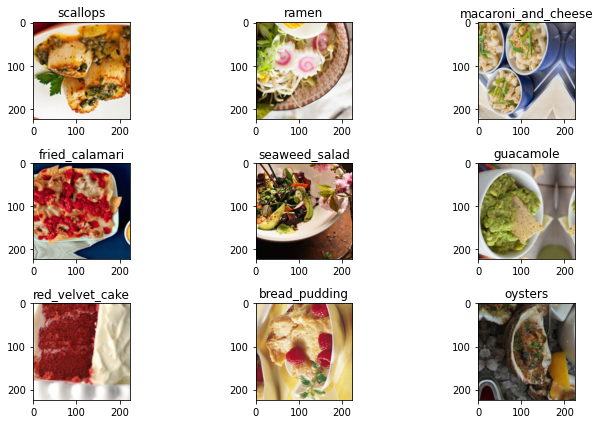

In [ ]:
data.show_batch(rows=3, figsize=(10,6), hide_axis=False)

In [ ]:
learn = create_cnn(data, models.resnet34, pretrained=True, metrics=[accuracy], callback_fns=ShowGraph)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


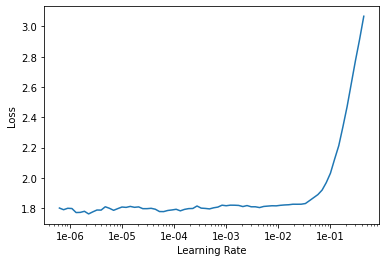

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.827183,2.250748,0.462176,00:47
1,1.828299,2.405533,0.429016,00:49
2,2.021552,2.777337,0.352332,00:48
3,2.293006,3.007810,0.325389,00:50
4,2.380185,2.846739,0.339896,00:53
5,2.219587,2.667336,0.378238,00:50
6,2.059504,2.606331,0.378238,00:49
7,1.928259,2.576955,0.384456,00:49
8,1.748145,2.333021,0.442487,00:49
9,1.538306,2.206238,0.500518,00:51


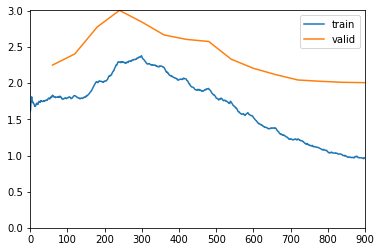

In [ ]:
learn.fit_one_cycle(15,1e-2)

In [ ]:
class SaveFeatures():
  features=None
  def __init__(self, m): 
      self.hook = m.register_forward_hook(self.hook_fn)
      self.features = None
  def hook_fn(self, module, input, output): 
      out = output.detach().cpu().numpy()
      if isinstance(self.features, type(None)):
          self.features = out
      else:
          self.features = np.row_stack((self.features, out))
  def remove(self): 
      self.hook.remove()
      
sf = SaveFeatures(learn.model[1][5]) ## Output before the last FC layer

In [ ]:
_= learn.get_preds(data.train_ds)
_= learn.get_preds(DatasetType.Valid)

In [ ]:
img_path = [str(x) for x in (list(data.train_ds.items)+list(data.valid_ds.items))]
feature_dict = dict(zip(img_path,sf.features))

In [ ]:
print(feature_dict)

{'/content/Recipes5k/images/strawberry_shortcake/27_strawberry_shortcakes_hostedLargeUrl.jpg': array([4.600214, 0.      , 0.      , 0.395607, ..., 0.      , 2.287284, 4.987615, 6.083541], dtype=float32), '/content/Recipes5k/images/strawberry_shortcake/2_strawberry_shortcakes_with_sweet_cream_cheese_biscuits_hostedLargeUrl.jpg': array([0.      , 3.85451 , 0.      , 1.398493, ..., 0.      , 1.867079, 5.885191, 0.      ], dtype=float32), '/content/Recipes5k/images/strawberry_shortcake/1_strawberry_shortcake_hostedLargeUrl.jpg': array([3.548908, 4.457303, 0.      , 4.363716, ..., 0.      , 0.      , 0.      , 8.412659], dtype=float32), '/content/Recipes5k/images/strawberry_shortcake/11_strawberry_shortcake_hostedLargeUrl.jpg': array([0.736179, 0.      , 0.      , 5.775916, ..., 0.      , 2.697489, 2.932831, 3.389263], dtype=float32), '/content/Recipes5k/images/strawberry_shortcake/30_cream_biscuit_strawberry_shortcake_hostedLargeUrl.jpg': array([1.542357, 0.      , 0.      , 7.853805, ...,

In [ ]:
!pip install bitarray

     |████████████████████████████████| 61kB 7.9MB/s 
  Created wheel for bitarray: filename=bitarray-1.6.1-cp36-cp36m-linux_x86_64.whl size=111971 sha256=ad497286774acbe68edc6ffb34f06e77528da0f9b5d8c86442a322b3858aefc3
  Stored in directory: /root/.cache/pip/wheels/9a/aa/60/bc6e8aa0406e979931b75cfec65be58d051d2122d05efb4c65
Successfully built bitarray


In [ ]:
import json

try:
    import redis
except ImportError:
    redis = None

__all__ = ['storage']


def storage(storage_config, index):
    """ Given the configuration for storage and the index, return the
    configured storage instance.
    """
    if 'dict' in storage_config:
        return InMemoryStorage(storage_config['dict'])
    elif 'redis' in storage_config:
        storage_config['redis']['db'] = index
        return RedisStorage(storage_config['redis'])
    else:
        raise ValueError("Only in-memory dictionary and Redis are supported.")

# lshash/storage.py
# Copyright 2012 Kay Zhu (a.k.a He Zhu) and contributors (see CONTRIBUTORS.txt)
#
# This module is part of lshash and is released under
# the MIT License: http://www.opensource.org/licenses/mit-license.php

import json

try:
    import redis
except ImportError:
    redis = None

__all__ = ['storage']


def storage(storage_config, index):
    """ Given the configuration for storage and the index, return the
    configured storage instance.
    """
    if 'dict' in storage_config:
        return InMemoryStorage(storage_config['dict'])
    elif 'redis' in storage_config:
        storage_config['redis']['db'] = index
        return RedisStorage(storage_config['redis'])
    else:
        raise ValueError("Only in-memory dictionary and Redis are supported.")


class BaseStorage(object):
    def __init__(self, config):
        """ An abstract class used as an adapter for storages. """
        raise NotImplementedError

    def keys(self):
        """ Returns a list of binary hashes that are used as dict keys. """
        raise NotImplementedError

    def set_val(self, key, val):
        """ Set `val` at `key`, note that the `val` must be a string. """
        raise NotImplementedError

    def get_val(self, key):
        """ Return `val` at `key`, note that the `val` must be a string. """
        raise NotImplementedError

    def append_val(self, key, val):
        """ Append `val` to the list stored at `key`.

        If the key is not yet present in storage, create a list with `val` at
        `key`.
        """
        raise NotImplementedError

    def get_list(self, key):
        """ Returns a list stored in storage at `key`.

        This method should return a list of values stored at `key`. `[]` should
        be returned if the list is empty or if `key` is not present in storage.
        """
        raise NotImplementedError


class InMemoryStorage(BaseStorage):
    def __init__(self, config):
        self.name = 'dict'
        self.storage = dict()

    def keys(self):
        return self.storage.keys()

    def set_val(self, key, val):
        self.storage[key] = val

    def get_val(self, key):
        return self.storage[key]

    def append_val(self, key, val):
        self.storage.setdefault(key, []).append(val)

    def get_list(self, key):
        return self.storage.get(key, [])


class RedisStorage(BaseStorage):
    def __init__(self, config):
        if not redis:
            raise ImportError("redis-py is required to use Redis as storage.")
        self.name = 'redis'
        self.storage = redis.StrictRedis(**config)

    def keys(self, pattern="*"):
        return self.storage.keys(pattern)

    def set_val(self, key, val):
        self.storage.set(key, val)

    def get_val(self, key):
        return self.storage.get(key)

    def append_val(self, key, val):
        self.storage.rpush(key, json.dumps(val))

    def get_list(self, key):
        return self.storage.lrange(key, 0, -1)


In [ ]:
import os
import json
import numpy as np

try:
    from bitarray import bitarray
except ImportError:
    bitarray = None


class LSHash(object):
    """ LSHash implments locality sensitive hashing using random projection for
    input vectors of dimension `input_dim`.

    Attributes:

    :param hash_size:
        The length of the resulting binary hash in integer. E.g., 32 means the
        resulting binary hash will be 32-bit long.
    :param input_dim:
        The dimension of the input vector. E.g., a grey-scale picture of 30x30
        pixels will have an input dimension of 900.
    :param num_hashtables:
        (optional) The number of hash tables used for multiple lookups.
    :param storage_config:
        (optional) A dictionary of the form `{backend_name: config}` where
        `backend_name` is the either `dict` or `redis`, and `config` is the
        configuration used by the backend. For `redis` it should be in the
        format of `{"redis": {"host": hostname, "port": port_num}}`, where
        `hostname` is normally `localhost` and `port` is normally 6379.
    :param matrices_filename:
        (optional) Specify the path to the compressed numpy file ending with
        extension `.npz`, where the uniform random planes are stored, or to be
        stored if the file does not exist yet.
    :param overwrite:
        (optional) Whether to overwrite the matrices file if it already exist
    """

    def __init__(self, hash_size, input_dim, num_hashtables=1,
                 storage_config=None, matrices_filename=None, overwrite=False):

        self.hash_size = hash_size
        self.input_dim = input_dim
        self.num_hashtables = num_hashtables

        if storage_config is None:
            storage_config = {'dict': None}
        self.storage_config = storage_config

        if matrices_filename and not matrices_filename.endswith('.npz'):
            raise ValueError("The specified file name must end with .npz")
        self.matrices_filename = matrices_filename
        self.overwrite = overwrite

        self._init_uniform_planes()
        self._init_hashtables()

    def _init_uniform_planes(self):
        """ Initialize uniform planes used to calculate the hashes

        if file `self.matrices_filename` exist and `self.overwrite` is
        selected, save the uniform planes to the specified file.

        if file `self.matrices_filename` exist and `self.overwrite` is not
        selected, load the matrix with `np.load`.

        if file `self.matrices_filename` does not exist and regardless of
        `self.overwrite`, only set `self.uniform_planes`.
        """

        if "uniform_planes" in self.__dict__:
            return

        if self.matrices_filename:
            file_exist = os.path.isfile(self.matrices_filename)
            if file_exist and not self.overwrite:
                try:
                    npzfiles = np.load(self.matrices_filename)
                except IOError:
                    print("Cannot load specified file as a numpy array")
                    raise
                else:
                    npzfiles = sorted(npzfiles.items(), key=lambda x: x[0])
                    self.uniform_planes = [t[1] for t in npzfiles]
            else:
                self.uniform_planes = [self._generate_uniform_planes()
                                       for _ in range(self.num_hashtables)]
                try:
                    np.savez_compressed(self.matrices_filename,
                                        *self.uniform_planes)
                except IOError:
                    print("IOError when saving matrices to specificed path")
                    raise
        else:
            self.uniform_planes = [self._generate_uniform_planes()
                                   for _ in range(self.num_hashtables)]

    def _init_hashtables(self):
        """ Initialize the hash tables such that each record will be in the
        form of "[storage1, storage2, ...]" """

        self.hash_tables = [storage(self.storage_config, i)
                            for i in range(self.num_hashtables)]

    def _generate_uniform_planes(self):
        """ Generate uniformly distributed hyperplanes and return it as a 2D
        numpy array.
        """

        return np.random.randn(self.hash_size, self.input_dim)

    def _hash(self, planes, input_point):
        """ Generates the binary hash for `input_point` and returns it.

        :param planes:
            The planes are random uniform planes with a dimension of
            `hash_size` * `input_dim`.
        :param input_point:
            A Python tuple or list object that contains only numbers.
            The dimension needs to be 1 * `input_dim`.
        """

        try:
            input_point = np.array(input_point)  # for faster dot product
            projections = np.dot(planes, input_point)
        except TypeError as e:
            print("""The input point needs to be an array-like object with
                  numbers only elements""")
            raise
        except ValueError as e:
            print("""The input point needs to be of the same dimension as
                  `input_dim` when initializing this LSHash instance""", e)
            raise
        else:
            return "".join(['1' if i > 0 else '0' for i in projections])

    def _as_np_array(self, json_or_tuple):
        """ Takes either a JSON-serialized data structure or a tuple that has
        the original input points stored, and returns the original input point
        in numpy array format.
        """
        if isinstance(json_or_tuple, str):
            # JSON-serialized in the case of Redis
            try:
                # Return the point stored as list, without the extra data
                tuples = json.loads(json_or_tuple)[0]
            except TypeError:
                print("The value stored is not JSON-serilizable")
                raise
        else:
            # If extra_data exists, `tuples` is the entire
            # (point:tuple, extra_data). Otherwise (i.e., extra_data=None),
            # return the point stored as a tuple
            tuples = json_or_tuple

        if isinstance(tuples[0], tuple):
            # in this case extra data exists
            return np.asarray(tuples[0])

        elif isinstance(tuples, (tuple, list)):
            try:
                return np.asarray(tuples)
            except ValueError as e:
                print("The input needs to be an array-like object", e)
                raise
        else:
            raise TypeError("query data is not supported")

    def index(self, input_point, extra_data=None):
        """ Index a single input point by adding it to the selected storage.

        If `extra_data` is provided, it will become the value of the dictionary
        {input_point: extra_data}, which in turn will become the value of the
        hash table. `extra_data` needs to be JSON serializable if in-memory
        dict is not used as storage.

        :param input_point:
            A list, or tuple, or numpy ndarray object that contains numbers
            only. The dimension needs to be 1 * `input_dim`.
            This object will be converted to Python tuple and stored in the
            selected storage.
        :param extra_data:
            (optional) Needs to be a JSON-serializable object: list, dicts and
            basic types such as strings and integers.
        """

        if isinstance(input_point, np.ndarray):
            input_point = input_point.tolist()

        if extra_data:
            value = (tuple(input_point), extra_data)
        else:
            value = tuple(input_point)

        for i, table in enumerate(self.hash_tables):
            table.append_val(self._hash(self.uniform_planes[i], input_point),
                             value)

    def query(self, query_point, num_results=None, distance_func=None):
        """ Takes `query_point` which is either a tuple or a list of numbers,
        returns `num_results` of results as a list of tuples that are ranked
        based on the supplied metric function `distance_func`.

        :param query_point:
            A list, or tuple, or numpy ndarray that only contains numbers.
            The dimension needs to be 1 * `input_dim`.
            Used by :meth:`._hash`.
        :param num_results:
            (optional) Integer, specifies the max amount of results to be
            returned. If not specified all candidates will be returned as a
            list in ranked order.
        :param distance_func:
            (optional) The distance function to be used. Currently it needs to
            be one of ("hamming", "euclidean", "true_euclidean",
            "centred_euclidean", "cosine", "l1norm"). By default "euclidean"
            will used.
        """

        candidates = set()
        if not distance_func:
            distance_func = "euclidean"

        if distance_func == "hamming":
            if not bitarray:
                raise ImportError(" Bitarray is required for hamming distance")

            for i, table in enumerate(self.hash_tables):
                binary_hash = self._hash(self.uniform_planes[i], query_point)
                for key in table.keys():
                    distance = LSHash.hamming_dist(key, binary_hash)
                    if distance < 2:
                        candidates.update(table.get_list(key))

            d_func = LSHash.euclidean_dist_square

        else:

            if distance_func == "euclidean":
                d_func = LSHash.euclidean_dist_square
            elif distance_func == "true_euclidean":
                d_func = LSHash.euclidean_dist
            elif distance_func == "centred_euclidean":
                d_func = LSHash.euclidean_dist_centred
            elif distance_func == "cosine":
                d_func = LSHash.cosine_dist
            elif distance_func == "l1norm":
                d_func = LSHash.l1norm_dist
            else:
                raise ValueError("The distance function name is invalid.")

            for i, table in enumerate(self.hash_tables):
                binary_hash = self._hash(self.uniform_planes[i], query_point)
                candidates.update(table.get_list(binary_hash))

        # rank candidates by distance function
        candidates = [(ix, d_func(query_point, self._as_np_array(ix)))
                      for ix in candidates]
        candidates.sort(key=lambda x: x[1])

        return candidates[:num_results] if num_results else candidates

    ### distance functions

    @staticmethod
    def hamming_dist(bitarray1, bitarray2):
        xor_result = bitarray(bitarray1) ^ bitarray(bitarray2)
        return xor_result.count()

    @staticmethod
    def euclidean_dist(x, y):
        """ This is a hot function, hence some optimizations are made. """
        diff = np.array(x) - y
        return np.sqrt(np.dot(diff, diff))

    @staticmethod
    def euclidean_dist_square(x, y):
        """ This is a hot function, hence some optimizations are made. """
        diff = np.array(x) - y
        return np.dot(diff, diff)

    @staticmethod
    def euclidean_dist_centred(x, y):
        """ This is a hot function, hence some optimizations are made. """
        diff = np.mean(x) - np.mean(y)
        return np.dot(diff, diff)

    @staticmethod
    def l1norm_dist(x, y):
        return sum(abs(x - y))

    @staticmethod
    def cosine_dist(x, y):
        return 1 - np.dot(x, y) / ((np.dot(x, x) * np.dot(y, y)) ** 0.5)


In [ ]:
k = 10 # hash size
L = 5  # number of tables
d = 512 # Dimension of Feature vector

lsh = LSHash(hash_size=k, input_dim=d, num_hashtables=L)

In [ ]:
for img_path, vec in tqdm_notebook(feature_dict.items()):
    lsh.index(vec.flatten(), extra_data=img_path)

__main__:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [ ]:
from PIL import Image


In [ ]:
import matplotlib.image as mpimg
def get_similar_item(idx, feature_dict, lsh_variable, n_items=5):
    response = lsh_variable.query(feature_dict[list(feature_dict.keys())[idx]].flatten(), 
                     num_results=n_items+1, distance_func='hamming')    
    columns = 3
    rows = int(np.ceil(n_items+1/columns))
    fig=plt.figure(figsize=(2*rows, 3*rows))
    for i in range(1, columns*rows +1):
      if i<n_items+2:
        images = response[i-1][0][1]
        #print(response[i-1][0][1])
        imgs = mpimg.imread(images)
        fig.add_subplot(rows, columns, i)
        plt.imshow(imgs)
        print(response[i-1][0][1])
        img = np.expand_dims(cv2.imread(images, 1), axis = 0)
        for x in range(3):
          img[:, :, :, x] = (img[:, :, :, x] - MEAN[x]) / STD[x]
        prediction = np.round(model_multilabel.predict(img)[0])
        labels = [categories[idx] for idx, current_prediction in enumerate(prediction) if current_prediction == 1]
        print('Prediction:', labels)  
        image_path = images
        image = Image.open(image_path).convert('RGB')
        
        transf_list = []
        transf_list.append(transforms.Resize(256))
        transf_list.append(transforms.CenterCrop(224))
        transform = transforms.Compose(transf_list)
        
        image_transf = transform(image)
        image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)
        num_valid = 1
        for i in range(1):
            with torch.no_grad():
                outputs = model.sample(image_tensor, greedy=greedy[i], temperature=temperature, beam=beam[i], true_ingrs=None)
                
            ingr_ids = outputs['ingr_ids'].cpu().numpy()
            recipe_ids = outputs['recipe_ids'].cpu().numpy()
                
            outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)            
            if valid['is_valid'] or show_anyways:                
                print ('RECIPE', num_valid)
                num_valid+=1
                #print ("greedy:", greedy[i], "beam:", beam[i])
                sum = 0
                BOLD = '\033[1m'
                END = '\033[0m'
                print (BOLD + '\nTitle:' + END,outs['title'])

                #print (BOLD + '\nIngredients:'+ END)
                #print (', '.join(outs['ingrs']))
                print (BOLD + '\nAllergy:' + END)
                for ingr in outs['ingrs']:
                  if ingr in nutrient.keys():
                    cal = int(nutrient[ingr])
                    sum = sum + cal
                  if ingr in allergy.keys():
                    print(allergy[ingr], sep = " ")
                print (BOLD + '\nTotal Calories: (approximate)' + END)
                print(sum)
                #print (BOLD + '\nInstructions:'+END)
                #print ('-'+'\n-'.join(outs['recipe']))
                print (BOLD + '\nCategory:' + END)
                print(labels)
                print ('='*20)
            else:
                pass
                print ("Not a valid recipe!")
                print ("Reason: ", valid['reason'])          


/content/Recipes5k/images/caprese_salad/2_chopped_caprese_salad_hostedLargeUrl.jpg
Prediction: ['mains', 'protein']


/content/inversecookingmaster/src/modules/multihead_attention.py:128: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/cuda/LegacyDefinitions.cpp:28.)
  float('-inf'),


RECIPE 1

Title: Tomato and mozzarella salad

Allergy:
Nightshade Allergy
Milk allergy / Lactose intolerance
Allium Allergy

Total Calories: (approximate)
240

Category:
['mains', 'protein']
/content/Recipes5k/images/bruschetta/14_grilled_chicken_bruschetta_hostedLargeUrl.jpg
Prediction: ['healthy', 'mains', 'protein', 'fats']
RECIPE 1

Title: Tomato and mozzarella salad

Allergy:
Nightshade Allergy
Milk allergy / Lactose intolerance
Allium Allergy

Total Calories: (approximate)
240

Category:
['healthy', 'mains', 'protein', 'fats']
/content/Recipes5k/images/caprese_salad/36_roz's_caprese_salad_with_grape_tomatoes,_mozzarella_&_basil_hostedLargeUrl.jpg
Prediction: ['healthy', 'mains', 'protein']
RECIPE 1

Title: Caprese salad

Allergy:
Nightshade Allergy
Milk allergy / Lactose intolerance

Total Calories: (approximate)
240

Category:
['healthy', 'mains', 'protein']
/content/Recipes5k/images/nachos/3_loaded_nachos_with_cashew_cheese_hostedLargeUrl.jpg
Prediction: ['mains', 'protein']
RE

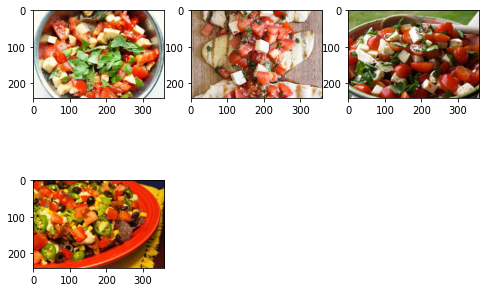

In [ ]:
get_similar_item(100, feature_dict, lsh,3)
